In [1]:
# --------------------------------------------------------------
# EXTRACAO DAS INFORMACOES DO CONJUNTO DE DADOS DE LINHAS
# DE ONIBUS DE FLORIANOPOLIS
# --------------------------------------------------------------
import pandas as pd
import numpy as np
import glob
import time

import matplotlib.pyplot as plt

### CONSTANTES
ticks = time.time()
pd.set_option('display.max_columns', None)
CAMINHO_DIRETORIO = "dataset/"
PATTERN = "*.txt"
# - data e hora de partida
# - data e hora de chegada
# - sentido (ida, volta)
# - linha
# - código do Veículo
# - total de giros => número de passageiros que passaram na catraca dos ônibus
# - quilômetros percorridos na viagem
# - duração da viagem

def ler_diretorio_em_dataframe(caminho: str, delimitador=None, colunas=None) -> list:
        ## Funcao responsavel por ler dados de um diretorio
        ## Recebe como parametros
        ## param caminho: caminho do diretorio para leitura
        delimitador = ";" if not delimitador else delimitador
        colunas = [] if not colunas else colunas
        return [
            pd.read_csv(nome_arquivo, delimiter=delimitador, low_memory=False, names=colunas)
            for nome_arquivo in glob.glob(caminho)
        ]

def concatenar_dataframes(lista_dataframes):
    ## Concatena lista de dataframes em um unico
    ## Retorna dataframe concatenado
    return pd.concat(lista_dataframes)

def executar_script():
    # Script que executará o restante do programa
    # Declaracao de classes
    # Lendo diretorios
    # Colunas
    n = [
        "DataPartida",
        "HoraPartida",
        "DataChegada",
        "HoraChegada",
        "Sentido",
        "Linha",
        "CodigoVeiculo",
        "DuracaoViagem",
        "GirosCatraca",
        "KmPercorridos"
    ]
    dataframes = ler_diretorio_em_dataframe("{0}/{1}".format(CAMINHO_DIRETORIO, PATTERN), colunas=n)
    # Resultado concatenado
    resultado_concatenado = concatenar_dataframes(dataframes)
    # Retornando resultado concatenado
    return resultado_concatenado

## Leitura de arquivos do diretorio
1. Montar lista de dataframes pandas equivalente a cada mes do ano de 2019.
2. Retornar dataframe concatenado com os dados brutos

In [2]:
dados_brutos = executar_script()
dados_brutos

,DataPartida,HoraPartida,DataChegada,HoraChegada,Sentido,Linha,CodigoVeiculo,DuracaoViagem,GirosCatraca,KmPercorridos
0,19/6/2019 00:00:00,30/12/1899 13:26:00,19/6/2019 00:00:00,30/12/1899 13:26:00,Ida,100,31021,30/12/1899 00:00:00,0,"0,00"
1,19/6/2019 00:00:00,30/12/1899 02:32:00,19/6/2019 00:00:00,30/12/1899 02:32:00,Ida,100,268,30/12/1899 00:00:00,0,"0,00"
2,16/6/2019 00:00:00,30/12/1899 04:10:00,16/6/2019 00:00:00,30/12/1899 04:10:00,Ida,100,306,30/12/1899 00:00:00,0,"0,00"
3,4/6/2019 00:00:00,30/12/1899 18:51:00,4/6/2019 00:00:00,30/12/1899 18:51:00,Ida,100,5109,30/12/1899 00:00:00,0,"0,00"
4,3/6/2019 00:00:00,30/12/1899 03:30:00,3/6/2019 00:00:00,30/12/1899 03:30:00,Ida,100,270,30/12/1899 00:00:00,0,"0,00"
...,...,...,...,...,...,...,...,...,...,...
221604,1/10/2019 00:00:00,30/12/1899 04:00:00,1/10/2019 00:00:00,30/12/1899 04:34:00,Volta,477,50404,30/12/1899 00:34:00,5,"17,29"
221605,1/10/2019 00:00:00,30/12/1899 04:29:00,1/10/2019 00:00:00,30/12/1899 05:12:00,Volta,477,50359,30/12/1899 00:43:00,7,"17,29"
221606,1/10/2019 00:00:00,30/12/1899 05:15:00,1/10/2019 00:00:00,30/12/1899 05:47:00,Volta,477,50404,30/12/1899 00:32:00,7,"17,29"
221607,1/10/2019 00:00:00,30/12/1899 05:47:00,1/10/2019 00:00:00,30/12/1899 05:47:00,Volta,477,50404,30/12/1899 00:00:00,0,"17,29"


## Objetivo, ter uma previsão da quantidade de quilometros que serao percorridos.

In [3]:
# 1. Analisar os dados do dataframe
# 2. Unindo data e hora partida em mesma coluna e data e hora chegada em mesma coluna
dados_analises = dados_brutos.copy()

def concatenar_data_e_hora(conteudo, coluna_data, coluna_hora):
    """
    Funcao que busca concatenar da hora retornando um datetime
    """
    conteudo[coluna_data] = conteudo[coluna_data].apply(lambda x: x[:10].replace(" 0","").strip())
    conteudo[coluna_hora] = conteudo[coluna_hora].apply(lambda x: x[-8:].strip())
    return pd.to_datetime(conteudo[coluna_data] + " " + conteudo[coluna_hora], dayfirst=True)

def converter_tipo_coluna(conteudo, nome_da_coluna, tipo_desejado):
    """
    Funcao que converte o tipo da coluna do dado dataframe
    """
    if tipo_desejado == 'float':
       conteudo[nome_da_coluna] = conteudo[nome_da_coluna].apply(lambda x: x.replace(",","."))
       conteudo[nome_da_coluna] = conteudo[nome_da_coluna].astype(tipo_desejado)
    elif tipo_desejado in ['minutesOnly']:
       conteudo[nome_da_coluna] = pd.to_datetime(conteudo[nome_da_coluna], dayfirst=True).dt.minute
    elif tipo_desejado in ['dateOnly']:
       conteudo[nome_da_coluna] = pd.to_datetime(conteudo[nome_da_coluna], dayfirst=True).dt.date
    elif tipo_desejado in ['timeOnly']:
       conteudo[nome_da_coluna] = pd.to_datetime(conteudo[nome_da_coluna], dayfirst=True).dt.time
    else:
       conteudo[nome_da_coluna] = conteudo[nome_da_coluna].astype(tipo_desejado)

    return conteudo

def gerar_tick_de_um_datetime(conteudo, nome_coluna_datetime):
    """
    Funcao que converte uma coluna de datetime gerando um tick
    """
    return conteudo[nome_coluna_datetime].apply(
        lambda x: time.mktime(x.timetuple())
    )

dados_analises['DataHoraPartida'] = concatenar_data_e_hora(dados_analises.copy(), 'DataPartida', 'HoraPartida')
dados_analises['DataHoraChegada'] = concatenar_data_e_hora(dados_analises.copy(), 'DataChegada', 'HoraChegada')
dados_analises['TicksPartida'] = gerar_tick_de_um_datetime(dados_analises, 'DataHoraPartida')
dados_analises['TicksChegada'] = gerar_tick_de_um_datetime(dados_analises, 'DataHoraChegada')
dados_analises = converter_tipo_coluna(dados_analises.copy(), 'GirosCatraca', 'int')
dados_analises = converter_tipo_coluna(dados_analises.copy(), 'KmPercorridos', 'float')
dados_analises = converter_tipo_coluna(dados_analises.copy(), 'DuracaoViagem', 'minutesOnly')
dados_analises = converter_tipo_coluna(dados_analises.copy(), 'DataPartida', 'dateOnly')
dados_analises = converter_tipo_coluna(dados_analises.copy(), 'HoraPartida', 'timeOnly')
dados_analises = converter_tipo_coluna(dados_analises.copy(), 'DataChegada', 'dateOnly')
dados_analises = converter_tipo_coluna(dados_analises.copy(), 'HoraChegada', 'timeOnly')

In [4]:
# 3. Limpeza de dados 1: Retirar colunas onde a datahora partida e datahora chegada são iguais
def filtrar_informacao(conteudo, predicado):
    """
    Funcao que realizar um busca no dataframe retornando seu resultado
    """
    return conteudo.query(predicado).reset_index().drop(columns=["index"])

dados_primeiro_filtro = filtrar_informacao(dados_analises.copy(), "DataHoraPartida < DataHoraChegada")
dados_primeiro_filtro

,DataPartida,HoraPartida,DataChegada,HoraChegada,Sentido,Linha,CodigoVeiculo,DuracaoViagem,GirosCatraca,KmPercorridos,DataHoraPartida,DataHoraChegada,TicksPartida,TicksChegada
0,2019-07-01,00:41:00,2019-07-01,01:20:00,Volta,100,272,39,3,16.30,2019-07-01 00:41:00,2019-07-01 01:20:00,1.561942e+09,1.561944e+09
1,2019-07-01,01:29:00,2019-07-01,02:01:00,Volta,100,272,32,1,16.30,2019-07-01 01:29:00,2019-07-01 02:01:00,1.561945e+09,1.561946e+09
2,2019-07-01,02:28:00,2019-07-01,02:59:00,Volta,100,272,31,0,16.30,2019-07-01 02:28:00,2019-07-01 02:59:00,1.561948e+09,1.561950e+09
3,2019-07-01,03:28:00,2019-07-01,04:03:00,Volta,100,272,35,2,16.30,2019-07-01 03:28:00,2019-07-01 04:03:00,1.561952e+09,1.561954e+09
4,2019-07-01,04:19:00,2019-07-01,04:54:00,Volta,100,272,35,3,16.30,2019-07-01 04:19:00,2019-07-01 04:54:00,1.561955e+09,1.561957e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639128,2019-10-01,03:55:00,2019-10-01,03:56:00,Volta,477,50359,1,0,17.29,2019-10-01 03:55:00,2019-10-01 03:56:00,1.569902e+09,1.569902e+09
2639129,2019-10-01,04:00:00,2019-10-01,04:34:00,Volta,477,50404,34,5,17.29,2019-10-01 04:00:00,2019-10-01 04:34:00,1.569902e+09,1.569904e+09
2639130,2019-10-01,04:29:00,2019-10-01,05:12:00,Volta,477,50359,43,7,17.29,2019-10-01 04:29:00,2019-10-01 05:12:00,1.569904e+09,1.569907e+09
2639131,2019-10-01,05:15:00,2019-10-01,05:47:00,Volta,477,50404,32,7,17.29,2019-10-01 05:15:00,2019-10-01 05:47:00,1.569907e+09,1.569909e+09


In [5]:
# 4. Limpeza de dados 2, retirando dados onde quilometros percorridos é zero e catraca maior que 0.
dados_segundo_filtro = filtrar_informacao(dados_primeiro_filtro.copy(), "~(KmPercorridos == 0.00 & GirosCatraca > 0) & ~(KmPercorridos == 0.00 & GirosCatraca == 0)")
# dados_segundo_filtro[['GirosCatraca','KmPercorridos']].hist(bins=20, range=[2.5, 75.5])
# dados_segundo_filtro[['GirosCatraca','KmPercorridos', 'DuracaoViagem']]
# 5. Limpeza de dados 3, retirando dados onde velocidade media ultrapasse os 80km/h
dados_terceiro_filtro = filtrar_informacao(dados_segundo_filtro.copy(), "KmPercorridos / (DuracaoViagem/60) <= 80")
dados_terceiro_filtro['Dur'] = ((dados_terceiro_filtro['DataHoraChegada'] - dados_terceiro_filtro['DataHoraPartida']).dt.total_seconds()//60).astype('int')
# 6. Limpeza de dados 4, retirando duracoes erradas de viagem
dados_quarto_filtro = filtrar_informacao(dados_terceiro_filtro.copy(), "Dur == DuracaoViagem")
# 7. Limpeza de dados 5, retirando ocorrencias em que um veiculo esta em duas viagens simultaneas
dados_quinto_filtro = dados_quarto_filtro.drop_duplicates(subset=["CodigoVeiculo", "TicksPartida"])
dados_quinto_filtro

,DataPartida,HoraPartida,DataChegada,HoraChegada,Sentido,Linha,CodigoVeiculo,DuracaoViagem,GirosCatraca,KmPercorridos,DataHoraPartida,DataHoraChegada,TicksPartida,TicksChegada,Dur
0,2019-07-01,00:41:00,2019-07-01,01:20:00,Volta,100,272,39,3,16.30,2019-07-01 00:41:00,2019-07-01 01:20:00,1.561942e+09,1.561944e+09,39
1,2019-07-01,01:29:00,2019-07-01,02:01:00,Volta,100,272,32,1,16.30,2019-07-01 01:29:00,2019-07-01 02:01:00,1.561945e+09,1.561946e+09,32
2,2019-07-01,02:28:00,2019-07-01,02:59:00,Volta,100,272,31,0,16.30,2019-07-01 02:28:00,2019-07-01 02:59:00,1.561948e+09,1.561950e+09,31
3,2019-07-01,03:28:00,2019-07-01,04:03:00,Volta,100,272,35,2,16.30,2019-07-01 03:28:00,2019-07-01 04:03:00,1.561952e+09,1.561954e+09,35
4,2019-07-01,04:19:00,2019-07-01,04:54:00,Volta,100,272,35,3,16.30,2019-07-01 04:19:00,2019-07-01 04:54:00,1.561955e+09,1.561957e+09,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330499,2019-10-01,03:30:00,2019-10-01,03:55:00,Volta,477,50359,25,1,17.29,2019-10-01 03:30:00,2019-10-01 03:55:00,1.569901e+09,1.569902e+09,25
2330500,2019-10-01,04:00:00,2019-10-01,04:34:00,Volta,477,50404,34,5,17.29,2019-10-01 04:00:00,2019-10-01 04:34:00,1.569902e+09,1.569904e+09,34
2330501,2019-10-01,04:29:00,2019-10-01,05:12:00,Volta,477,50359,43,7,17.29,2019-10-01 04:29:00,2019-10-01 05:12:00,1.569904e+09,1.569907e+09,43
2330502,2019-10-01,05:15:00,2019-10-01,05:47:00,Volta,477,50404,32,7,17.29,2019-10-01 05:15:00,2019-10-01 05:47:00,1.569907e+09,1.569909e+09,32


In [6]:
import datetime
# 8. Análise, ordernar pelo tempo
dados_ordernados_por_tick_linha = dados_quinto_filtro.copy().sort_values(by=["Linha", "TicksPartida", "Sentido"])
dados_ordernados_por_tick_linha

,DataPartida,HoraPartida,DataChegada,HoraChegada,Sentido,Linha,CodigoVeiculo,DuracaoViagem,GirosCatraca,KmPercorridos,DataHoraPartida,DataHoraChegada,TicksPartida,TicksChegada,Dur
1372293,2018-11-02,00:35:00,2018-11-02,01:27:00,Volta,100,0247,52,9,16.30,2018-11-02 00:35:00,2018-11-02 01:27:00,1.541119e+09,1.541122e+09,52
1372296,2018-11-02,01:27:00,2018-11-02,02:18:00,Volta,100,0247,51,22,16.30,2018-11-02 01:27:00,2018-11-02 02:18:00,1.541122e+09,1.541125e+09,51
1372297,2018-11-02,02:27:00,2018-11-02,03:06:00,Volta,100,0247,39,19,16.30,2018-11-02 02:27:00,2018-11-02 03:06:00,1.541126e+09,1.541128e+09,39
1372294,2018-11-02,03:31:00,2018-11-02,04:07:00,Volta,100,0247,36,28,16.30,2018-11-02 03:31:00,2018-11-02 04:07:00,1.541129e+09,1.541132e+09,36
1372295,2018-11-02,04:27:00,2018-11-02,05:08:00,Volta,100,0247,41,6,16.30,2018-11-02 04:27:00,2018-11-02 05:08:00,1.541133e+09,1.541135e+09,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372116,2019-10-29,12:25:00,2019-10-29,13:09:00,Ida,M941,1445,44,63,20.39,2019-10-29 12:25:00,2019-10-29 13:09:00,1.572352e+09,1.572355e+09,44
1372138,2019-10-30,11:49:00,2019-10-30,12:42:00,Volta,M941,1483,53,70,22.15,2019-10-30 11:49:00,2019-10-30 12:42:00,1.572436e+09,1.572439e+09,53
1372115,2019-10-30,12:26:00,2019-10-30,13:07:00,Ida,M941,1431,41,25,20.39,2019-10-30 12:26:00,2019-10-30 13:07:00,1.572438e+09,1.572441e+09,41
1372137,2019-10-31,11:49:00,2019-10-31,12:40:00,Volta,M941,1483,51,75,22.15,2019-10-31 11:49:00,2019-10-31 12:40:00,1.572523e+09,1.572526e+09,51


## Algumas linhas possuem apenas volta, outras apenas ida e outras ida e volta.

In [8]:
# 9. Análise, ida e volta de uma linha
dados_ida = filtrar_informacao(dados_ordernados_por_tick_linha.copy(), "Sentido == 'Ida'")
dados_ida = dados_ida.rename(
    columns=dict(
        zip(
            list(dados_ida.columns),
            ["ida_" + i for i in list(dados_ida.columns)]
        )
    )
)
dados_volta = filtrar_informacao(dados_ordernados_por_tick_linha.copy(), "Sentido == 'Volta'")
dados_volta = dados_volta.rename(
    columns=dict(
        zip(
            list(dados_volta.columns),
            ["volta_" + i for i in list(dados_volta.columns)]
        )
    )
)
# 10. Análise, exemplo de linha que não possui ida
dados_ida_por_linha = filtrar_informacao(dados_ida.copy(), "ida_Linha == '100'")
dados_ida_por_linha

,ida_DataPartida,ida_HoraPartida,ida_DataChegada,ida_HoraChegada,ida_Sentido,ida_Linha,ida_CodigoVeiculo,ida_DuracaoViagem,ida_GirosCatraca,ida_KmPercorridos,ida_DataHoraPartida,ida_DataHoraChegada,ida_TicksPartida,ida_TicksChegada,ida_Dur


In [9]:
# 11. Análise, exemplo de linha que apenas possui volta
dados_volta_por_linha = filtrar_informacao(dados_volta.copy(), "volta_Linha == '100'")
dados_volta_por_linha

,volta_DataPartida,volta_HoraPartida,volta_DataChegada,volta_HoraChegada,volta_Sentido,volta_Linha,volta_CodigoVeiculo,volta_DuracaoViagem,volta_GirosCatraca,volta_KmPercorridos,volta_DataHoraPartida,volta_DataHoraChegada,volta_TicksPartida,volta_TicksChegada,volta_Dur
0,2018-11-02,00:35:00,2018-11-02,01:27:00,Volta,100,0247,52,9,16.3,2018-11-02 00:35:00,2018-11-02 01:27:00,1.541119e+09,1.541122e+09,52
1,2018-11-02,01:27:00,2018-11-02,02:18:00,Volta,100,0247,51,22,16.3,2018-11-02 01:27:00,2018-11-02 02:18:00,1.541122e+09,1.541125e+09,51
2,2018-11-02,02:27:00,2018-11-02,03:06:00,Volta,100,0247,39,19,16.3,2018-11-02 02:27:00,2018-11-02 03:06:00,1.541126e+09,1.541128e+09,39
3,2018-11-02,03:31:00,2018-11-02,04:07:00,Volta,100,0247,36,28,16.3,2018-11-02 03:31:00,2018-11-02 04:07:00,1.541129e+09,1.541132e+09,36
4,2018-11-02,04:27:00,2018-11-02,05:08:00,Volta,100,0247,41,6,16.3,2018-11-02 04:27:00,2018-11-02 05:08:00,1.541133e+09,1.541135e+09,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,2019-11-01,00:46:00,2019-11-01,01:25:00,Volta,100,264,39,13,16.3,2019-11-01 00:46:00,2019-11-01 01:25:00,1.572569e+09,1.572572e+09,39
1587,2019-11-01,01:27:00,2019-11-01,02:08:00,Volta,100,264,41,15,16.3,2019-11-01 01:27:00,2019-11-01 02:08:00,1.572572e+09,1.572574e+09,41
1588,2019-11-01,02:32:00,2019-11-01,03:06:00,Volta,100,264,34,4,16.3,2019-11-01 02:32:00,2019-11-01 03:06:00,1.572576e+09,1.572578e+09,34
1589,2019-11-01,03:30:00,2019-11-01,04:04:00,Volta,100,264,34,7,16.3,2019-11-01 03:30:00,2019-11-01 04:04:00,1.572579e+09,1.572581e+09,34


In [10]:
# 12. Análise, avaliando capacidade total dos veiculos
capacidade_total_veiculos = dados_ordernados_por_tick_linha.groupby("Linha")["GirosCatraca"].agg('max')
capacidade_total_veiculos

Linha
100       95
101       36
104      109
109       51
110       27
        ... 
M250     111
M250V     86
M273     101
M940      73
M941      94
Name: GirosCatraca, Length: 222, dtype: int64

In [11]:
# 13. Analise, adicionando colunas de dia da semana
dados_ordernados_por_tick_linha["dia_semana_partida"] = dados_ordernados_por_tick_linha.copy()["DataHoraPartida"].dt.day_name()
dados_ordernados_por_tick_linha["dia_semana_chegada"] = dados_ordernados_por_tick_linha.copy()["DataHoraChegada"].dt.day_name()
dados_com_semana = dados_ordernados_por_tick_linha.copy()
dados_com_semana

,DataPartida,HoraPartida,DataChegada,HoraChegada,Sentido,Linha,CodigoVeiculo,DuracaoViagem,GirosCatraca,KmPercorridos,DataHoraPartida,DataHoraChegada,TicksPartida,TicksChegada,Dur,dia_semana_partida,dia_semana_chegada
1372293,2018-11-02,00:35:00,2018-11-02,01:27:00,Volta,100,0247,52,9,16.30,2018-11-02 00:35:00,2018-11-02 01:27:00,1.541119e+09,1.541122e+09,52,Friday,Friday
1372296,2018-11-02,01:27:00,2018-11-02,02:18:00,Volta,100,0247,51,22,16.30,2018-11-02 01:27:00,2018-11-02 02:18:00,1.541122e+09,1.541125e+09,51,Friday,Friday
1372297,2018-11-02,02:27:00,2018-11-02,03:06:00,Volta,100,0247,39,19,16.30,2018-11-02 02:27:00,2018-11-02 03:06:00,1.541126e+09,1.541128e+09,39,Friday,Friday
1372294,2018-11-02,03:31:00,2018-11-02,04:07:00,Volta,100,0247,36,28,16.30,2018-11-02 03:31:00,2018-11-02 04:07:00,1.541129e+09,1.541132e+09,36,Friday,Friday
1372295,2018-11-02,04:27:00,2018-11-02,05:08:00,Volta,100,0247,41,6,16.30,2018-11-02 04:27:00,2018-11-02 05:08:00,1.541133e+09,1.541135e+09,41,Friday,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372116,2019-10-29,12:25:00,2019-10-29,13:09:00,Ida,M941,1445,44,63,20.39,2019-10-29 12:25:00,2019-10-29 13:09:00,1.572352e+09,1.572355e+09,44,Tuesday,Tuesday
1372138,2019-10-30,11:49:00,2019-10-30,12:42:00,Volta,M941,1483,53,70,22.15,2019-10-30 11:49:00,2019-10-30 12:42:00,1.572436e+09,1.572439e+09,53,Wednesday,Wednesday
1372115,2019-10-30,12:26:00,2019-10-30,13:07:00,Ida,M941,1431,41,25,20.39,2019-10-30 12:26:00,2019-10-30 13:07:00,1.572438e+09,1.572441e+09,41,Wednesday,Wednesday
1372137,2019-10-31,11:49:00,2019-10-31,12:40:00,Volta,M941,1483,51,75,22.15,2019-10-31 11:49:00,2019-10-31 12:40:00,1.572523e+09,1.572526e+09,51,Thursday,Thursday


In [12]:
# 14. Analise, filtrando
import datetime
pd.set_option('display.max_rows', 400)
dados_com_semana["DataHoraPartida120"] = pd.to_datetime(dados_com_semana["DataHoraPartida"]).dt.floor('120T')
dados_com_semana_grp = dados_com_semana.copy().groupby(["Linha","DataHoraPartida120", "dia_semana_partida", "CodigoVeiculo"], as_index=False).agg({"GirosCatraca": ["sum"], "Sentido": ["count"], "Dur": ["sum"], "KmPercorridos": ["sum"]})
dados_com_semana_grp.columns = [i.replace("sum","").replace("count","") for i in list(map(''.join, dados_com_semana_grp.columns.values))]
dados_com_semana_grp = dados_com_semana_grp.rename(columns={"Sentido": "Viagens", "Dur": "Duracao"})
dados_com_semana_grp["VelocidadeMedia"] = (dados_com_semana_grp["KmPercorridos"]/(dados_com_semana_grp["Duracao"]/60))
dados_filtrados_com_linha_100 = dados_com_semana_grp.copy()[dados_com_semana_grp['Linha'] == '100']
dados_filtrados_com_linha_100.to_csv('dataset.csv')
dados_filtrados_com_linha_100

,Linha,DataHoraPartida120,dia_semana_partida,CodigoVeiculo,GirosCatraca,Viagens,Duracao,KmPercorridos,VelocidadeMedia
0,100,2018-11-02 00:00:00,Friday,0247,31,2,103,32.6,18.990291
1,100,2018-11-02 02:00:00,Friday,0247,47,2,75,32.6,26.080000
2,100,2018-11-02 04:00:00,Friday,0247,6,1,41,16.3,23.853659
3,100,2018-11-03 00:00:00,Saturday,0287,16,2,66,32.6,29.636364
4,100,2018-11-03 02:00:00,Saturday,0287,4,2,56,32.6,34.928571
...,...,...,...,...,...,...,...,...,...
991,100,2019-10-31 02:00:00,Thursday,252,7,2,71,32.6,27.549296
992,100,2019-10-31 04:00:00,Thursday,252,4,1,31,16.3,31.548387
993,100,2019-11-01 00:00:00,Friday,264,28,2,80,32.6,24.450000
994,100,2019-11-01 02:00:00,Friday,264,11,2,68,32.6,28.764706


<Axes: xlabel='DataHoraPartida120'>

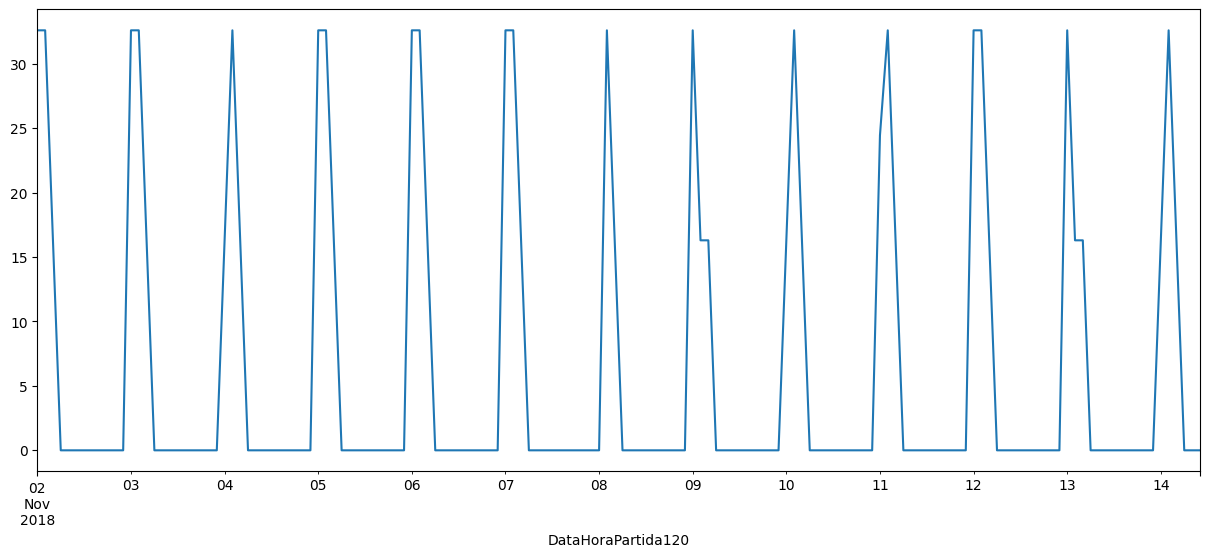

In [13]:
# 15. Filtrando para montar data hora em janelas de 2 horas e quilometros percorridos
dados_indexados = dados_filtrados_com_linha_100.copy()[['DataHoraPartida120','KmPercorridos']].set_index('DataHoraPartida120')
dados_indexados = dados_indexados['KmPercorridos'].resample('2H').mean()
dados_indexados = dados_indexados.fillna(0)
dados_indexados[:150].plot(figsize = (15, 6))

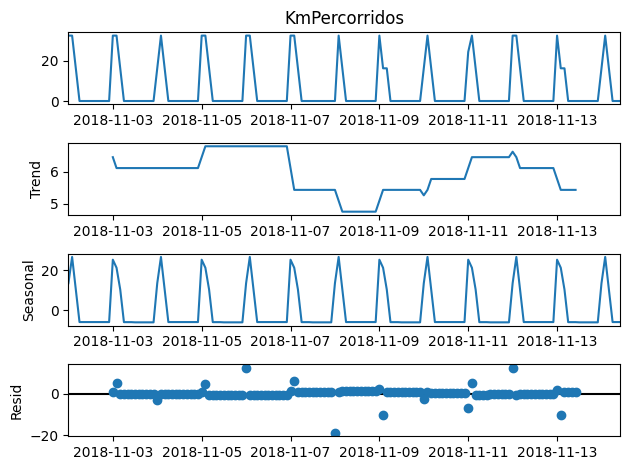

In [14]:
import statsmodels.api as sm
# rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(dados_indexados[:150], model='additive')
fig = decomposition.plot()
plt.show()

# Leitura e codificação do dataset

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

#lendo do dataset limpo
dataset = pd.read_csv('/content/dataset.csv')

#transformando atributos discretos em contínuos
label_encoder = LabelEncoder()

#separação de atributos categoricos para codificar
categorical_attbr = ['DataHoraPartida120', 'dia_semana_partida']

#atributos numéricos
numerical_attbr = dataset.drop('DataHoraPartida120', axis=1)
numerical_attbr = numerical_attbr.drop('dia_semana_partida', axis=1)

X_categorical = dataset[categorical_attbr]
X_encoded = pd.DataFrame()

#codificação de valores categoricos
for column in categorical_attbr:
    encoded_column = label_encoder.fit_transform(X_categorical[column])
    X_encoded[column] = encoded_column

#concatena valores categoricos codificado com continuos
X = pd.concat([numerical_attbr, X_encoded], axis=1)
y = dataset['KmPercorridos']

#remoção de sujeira
X =  X.drop('Unnamed: 0', axis=1)


# Ajuste de hiperparâmetros com gridsearch

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

#configurando semente do gerador de números aleatórios
np.random.seed(20)

rf = RandomForestRegressor()

#dicionário com valores de hiperparâmetros para serem variados
param_grid = {
  "n_estimators": [200, 300, 400],
  "criterion": ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
  "max_features": ["sqrt", "log2"],
  "max_depth": [3, 5, 7],
  "min_samples_split": [100, 200, 300], #100,
  "bootstrap": [True, False],
  "min_samples_leaf": [100, 200]
}

grid = GridSearchCV(rf, param_grid, cv=10, scoring='neg_mean_squared_error', verbose=1)

grid_search=grid.fit(X, y)

In [ ]:
#printar melhores hiperparâmetros
print(grid_search.best_params_)

{'bootstrap': False, 'criterion': 'poisson', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


## Treinamento e validação de modelos utilizando cross validation com K = 10

In [19]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestRegressor
np.random.seed(20)

# {'bootstrap': False, 'criterion': 'poisson', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestRegressor(n_estimators=300,
                           max_depth=5,
                           max_features= 'log2',
                           min_samples_leaf=100,
                           bootstrap=False,
                           criterion='poisson',
                           min_samples_split=200
                           )

scores_list = ['neg_root_mean_squared_error', 'neg_mean_squared_error', 'neg_mean_absolute_error']
scores = cross_validate(rf, X, y, scoring=scores_list, cv=10)

In [25]:
#treinando modelo com conjunto de testes
rf.fit(X_train, y_train)
y_prediction = rf.predict(X_test)

# Métricas e avaliação

In [20]:
mse_scores = -scores['test_neg_mean_squared_error']
rmse_scores = -scores['test_neg_root_mean_squared_error']
mae_scores = -scores['test_neg_mean_absolute_error']
confidence_rmse = 1.96 * np.std(rmse_scores) / np.sqrt(len(rmse_scores))
confidence_mse = 1.96 * np.std(mse_scores) / np.sqrt(len(mse_scores))
confidence_mae = 1.96 * np.std(mae_scores) / np.sqrt(len(mae_scores))



print('Médias \nRSME {0} \nMSE {1} \nMAE {2}'.format(-1 * scores['test_neg_mean_squared_error'].mean(),
                                                      -1 * scores['test_neg_root_mean_squared_error'].mean(),
                                                      -1 * scores['test_neg_mean_absolute_error'].mean()
                                                      ))

Médias 
RSME 9.8139576544868 
MSE 2.192345351790272 
MAE 1.001916871901878


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_prediction)
mae = mean_absolute_error(y_test, y_prediction)
rmse = mse**.5
print("MSE: ", mse)
print("MAE: ",mae)
print("RMSE: ", rmse)

MSE:  7.092187638619716
MAE:  1.02375741582265
RMSE:  2.6631161519204745


# Plot das árvores

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=6,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

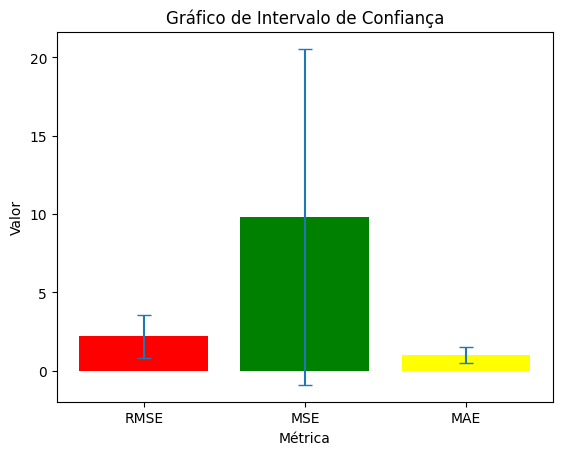

In [21]:
# Calcular as médias das métricas de desempenho
mean_rmse = np.mean(rmse_scores)
mean_mse = np.mean(mse_scores)
mean_mae = np.mean(mae_scores)

# Plotar o gráfico de intervalo de confiança
metrics = ['RMSE', 'MSE', 'MAE']
means = [mean_rmse, mean_mse, mean_mae]
confidences = [confidence_rmse, confidence_mse, confidence_mae]
colors = ['red', 'green', 'yellow']

plt.bar(metrics, means, color=colors)
plt.errorbar(metrics, means, yerr=confidences, fmt='none', capsize=5)
plt.xlabel('Métrica')
plt.ylabel('Valor')
plt.title('Gráfico de Intervalo de Confiança')
plt.show()

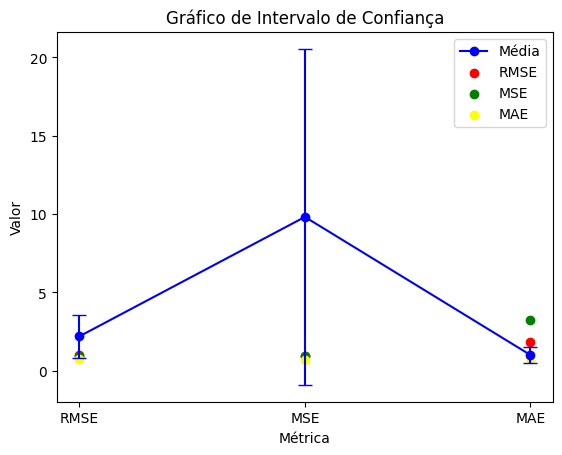

In [22]:
fig, ax = plt.subplots()
ax.plot(metrics, means, marker='o', linestyle='-', color='blue', label='Média')
ax.scatter(metrics, - scores['test_neg_root_mean_squared_error'][:3], color='red', label='RMSE')
ax.scatter(metrics, - scores['test_neg_mean_squared_error'][:3], color='green', label='MSE')
ax.scatter(metrics, -scores['test_neg_mean_absolute_error'][:3], color='yellow', label='MAE')
ax.errorbar(metrics, means, yerr=confidences, fmt='none', capsize=5, color='blue')
ax.set_xlabel('Métrica')
ax.set_ylabel('Valor')
ax.set_title('Gráfico de Intervalo de Confiança')
ax.legend()

plt.show()

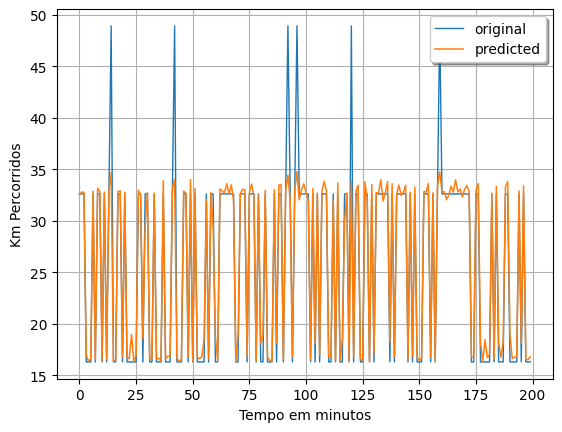

In [26]:
import matplotlib.pyplot as plt

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_prediction, linewidth=1.1, label="predicted")
plt.xlabel('Tempo em minutos')
plt.ylabel('Km Percorridos')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()